# Introduction

Today we will do some visualizations and understand "Airline Passenger Satisfaction" dataset.

Now let's import the libraries we wil use and the dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(103904, 25)

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Features in the data:
- Gender: Gender of the passengers (Female, Male)

- Customer Type: The customer type (Loyal customer, disloyal customer)

- Age: The actual age of the passengers

- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- Flight distance: The flight distance of this journey

- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

- Ease of Online booking: Satisfaction level of online booking

- Gate location: Satisfaction level of Gate location

- Food and drink: Satisfaction level of Food and drink

- Online boarding: Satisfaction level of online boarding

- Seat comfort: Satisfaction level of Seat comfort

- Inflight entertainment: Satisfaction level of inflight entertainment

- On-board service: Satisfaction level of On-board service

- Leg room service: Satisfaction level of Leg room service

- Baggage handling: Satisfaction level of baggage handling

- Check-in service: Satisfaction level of Check-in service

- Inflight service: Satisfaction level of inflight service

- Cleanliness: Satisfaction level of Cleanliness

- Departure Delay in Minutes: Minutes delayed when departure

- Arrival Delay in Minutes: Minutes delayed when Arrival

- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Inspecting

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.columns.to_list()

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [8]:
exclude_ = ['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age']
categorical_columns = [x for x in df.columns.to_list() if x not in exclude_]
for i in categorical_columns:
    df[i] = df[i].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [10]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [11]:
df.describe(include='category')

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


In [12]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}  {df[col].unique()}\n')

Gender: 2  ['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Customer Type: 2  ['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']

Age: 75  [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]

Type of Travel: 2  ['Personal Travel', 'Business travel']
Categories (2, object): ['Business travel', 'Personal Travel']

Class: 3  ['Eco Plus', 'Business', 'Eco']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']

Flight Distance: 3802  [ 460  235 1142 ...  974 1479  400]

Inflight wifi service: 6  [3, 2, 4, 1, 5, 0]
Categories (6, int64): [0, 1, 2, 3, 4, 5]

Departure/Arrival time convenient: 6  [4, 2, 5, 3, 1, 0]
Categories (6, int64): [0, 1, 2, 3, 4, 5]

Ease of Online booking: 6  [3, 2, 5, 4, 1, 0]
Categories (6, int64): [0, 1, 2, 3, 4, 5]

Gate 

In [13]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.duplicated().sum()

0

# Univariate analysis

In [16]:
len(categorical_columns)

19

In [17]:
sns.set(style="darkgrid")

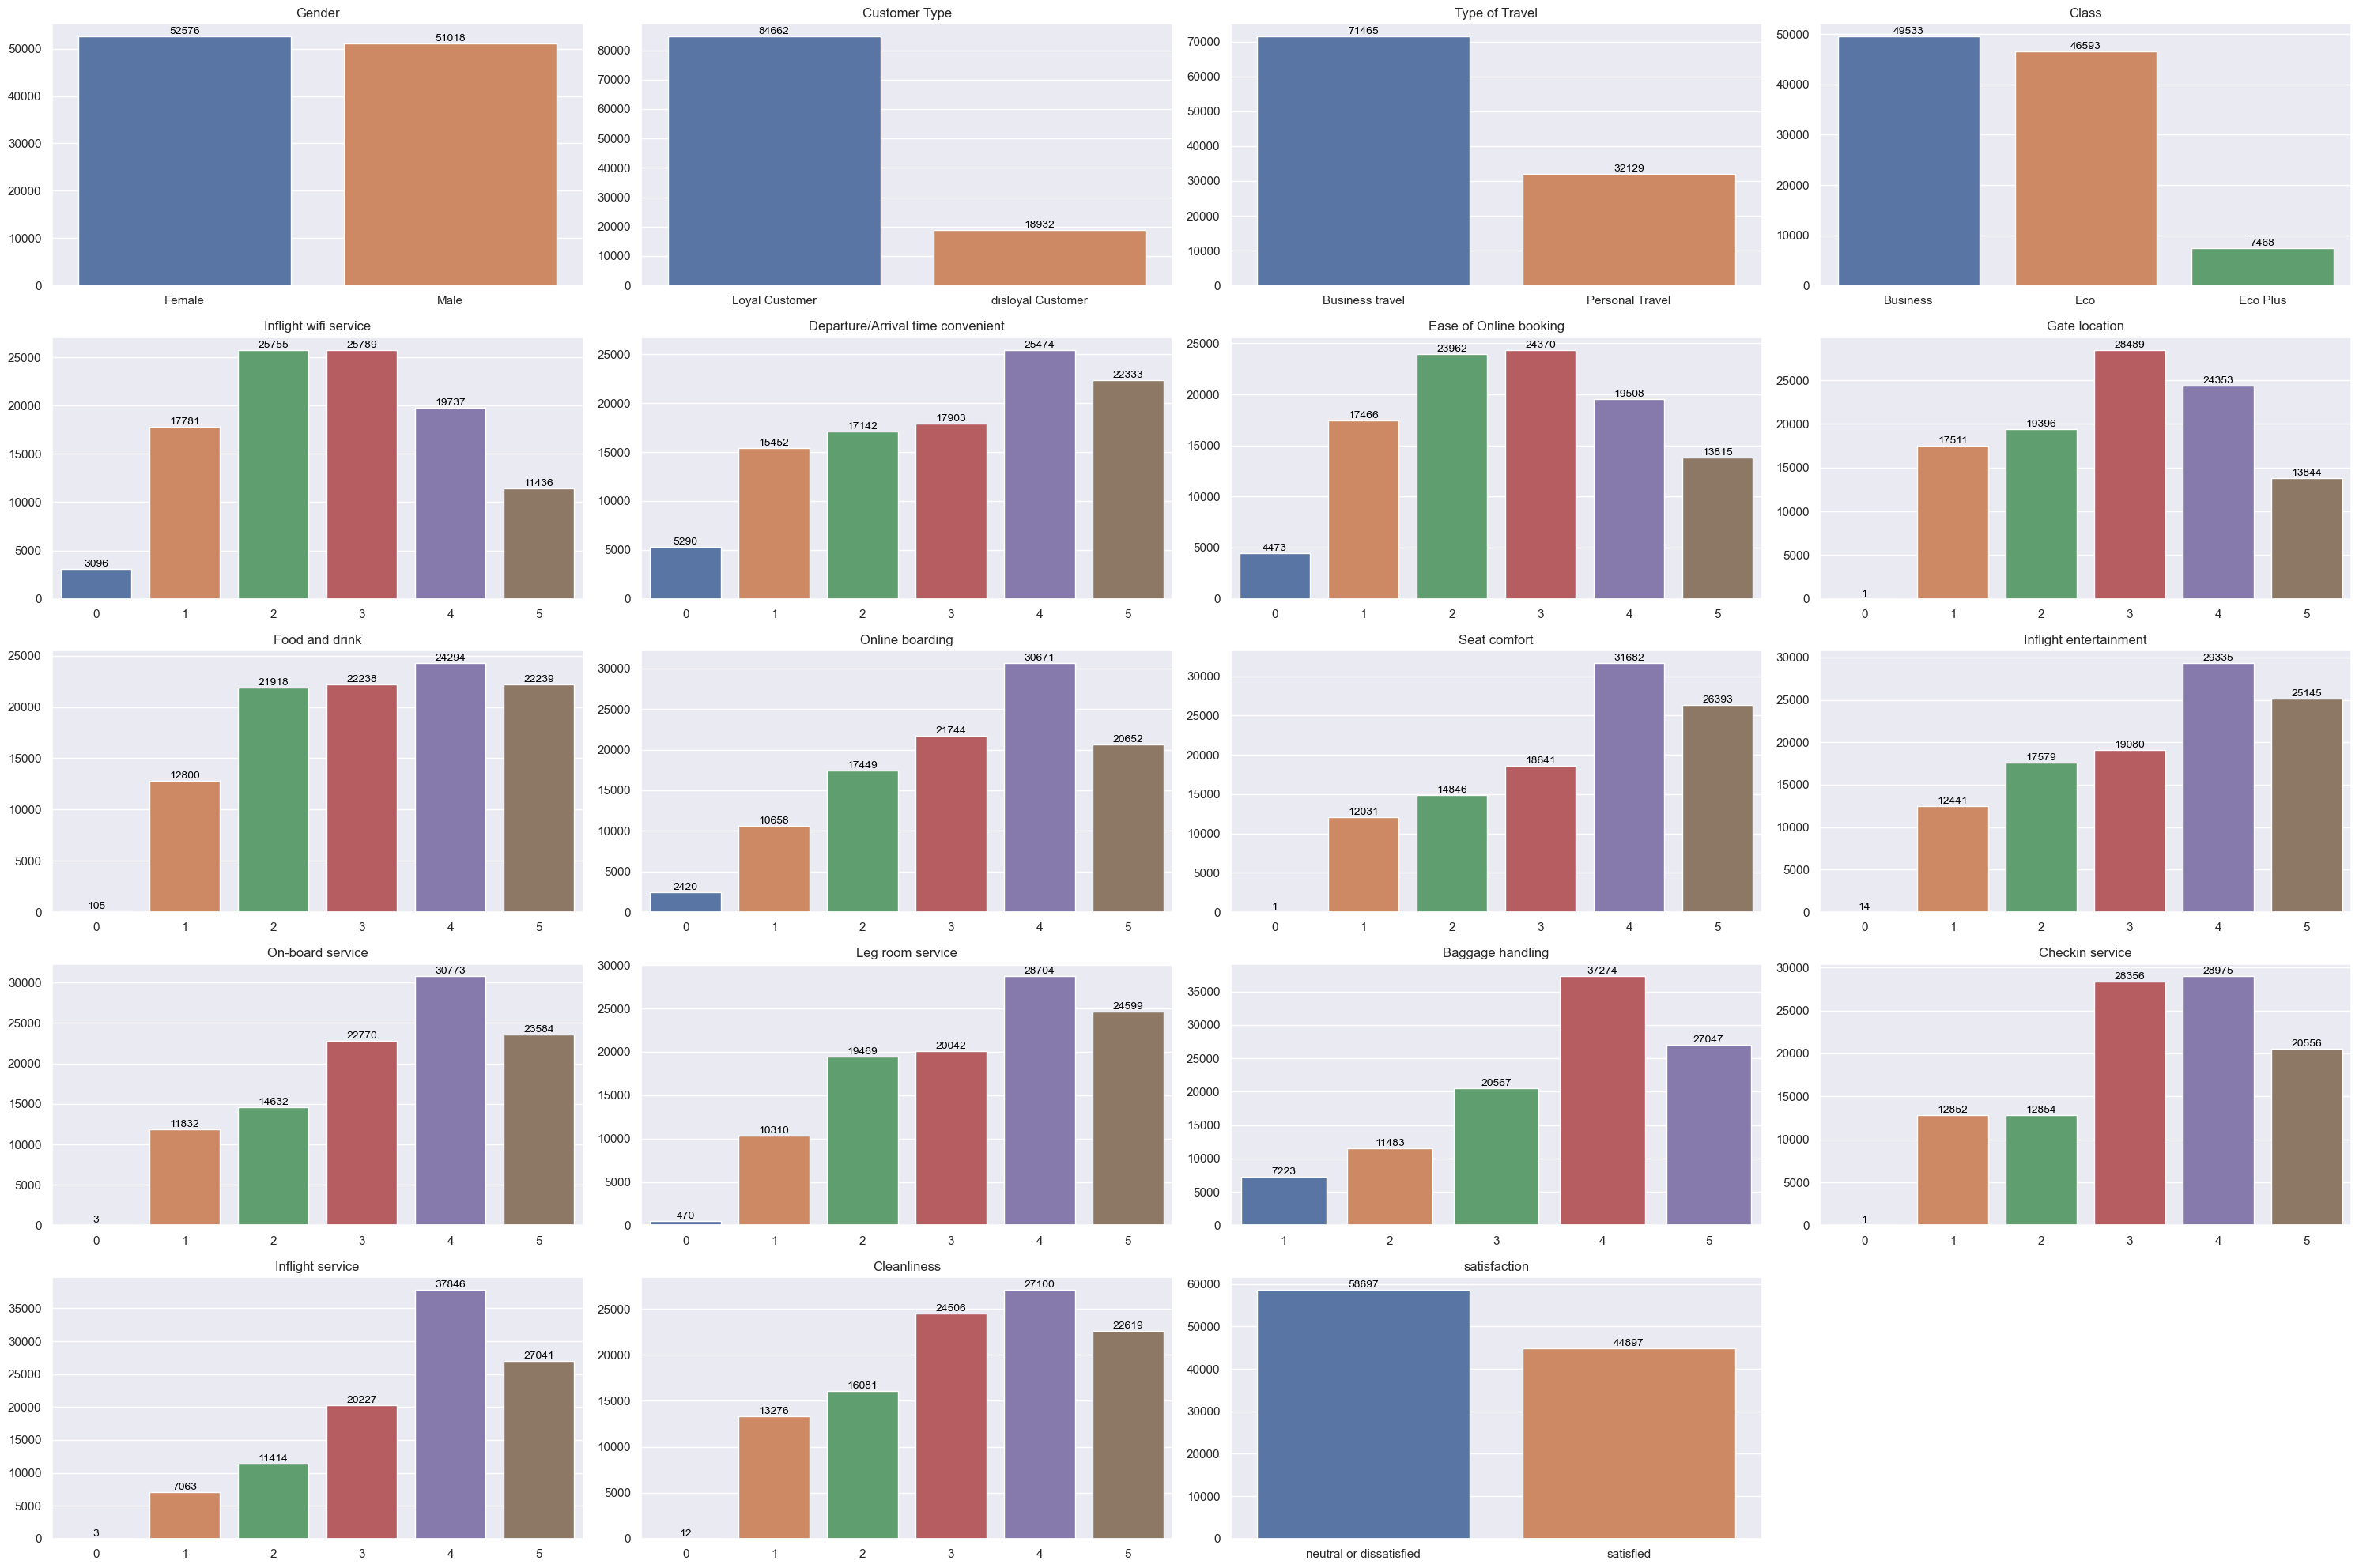

In [18]:
fig, ax = plt.subplots((len(categorical_columns)+1)//4, 4, figsize=(30,20))
ax = ax.flatten()
for i in range(len(categorical_columns)):
    sns.countplot(df[categorical_columns[i]], ax=ax[i])
    ax[i].set_title(categorical_columns[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    for p in ax[i].patches:
        ax[i].text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=10, color='black', ha='center', va='bottom')
for i in range(len(categorical_columns), len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

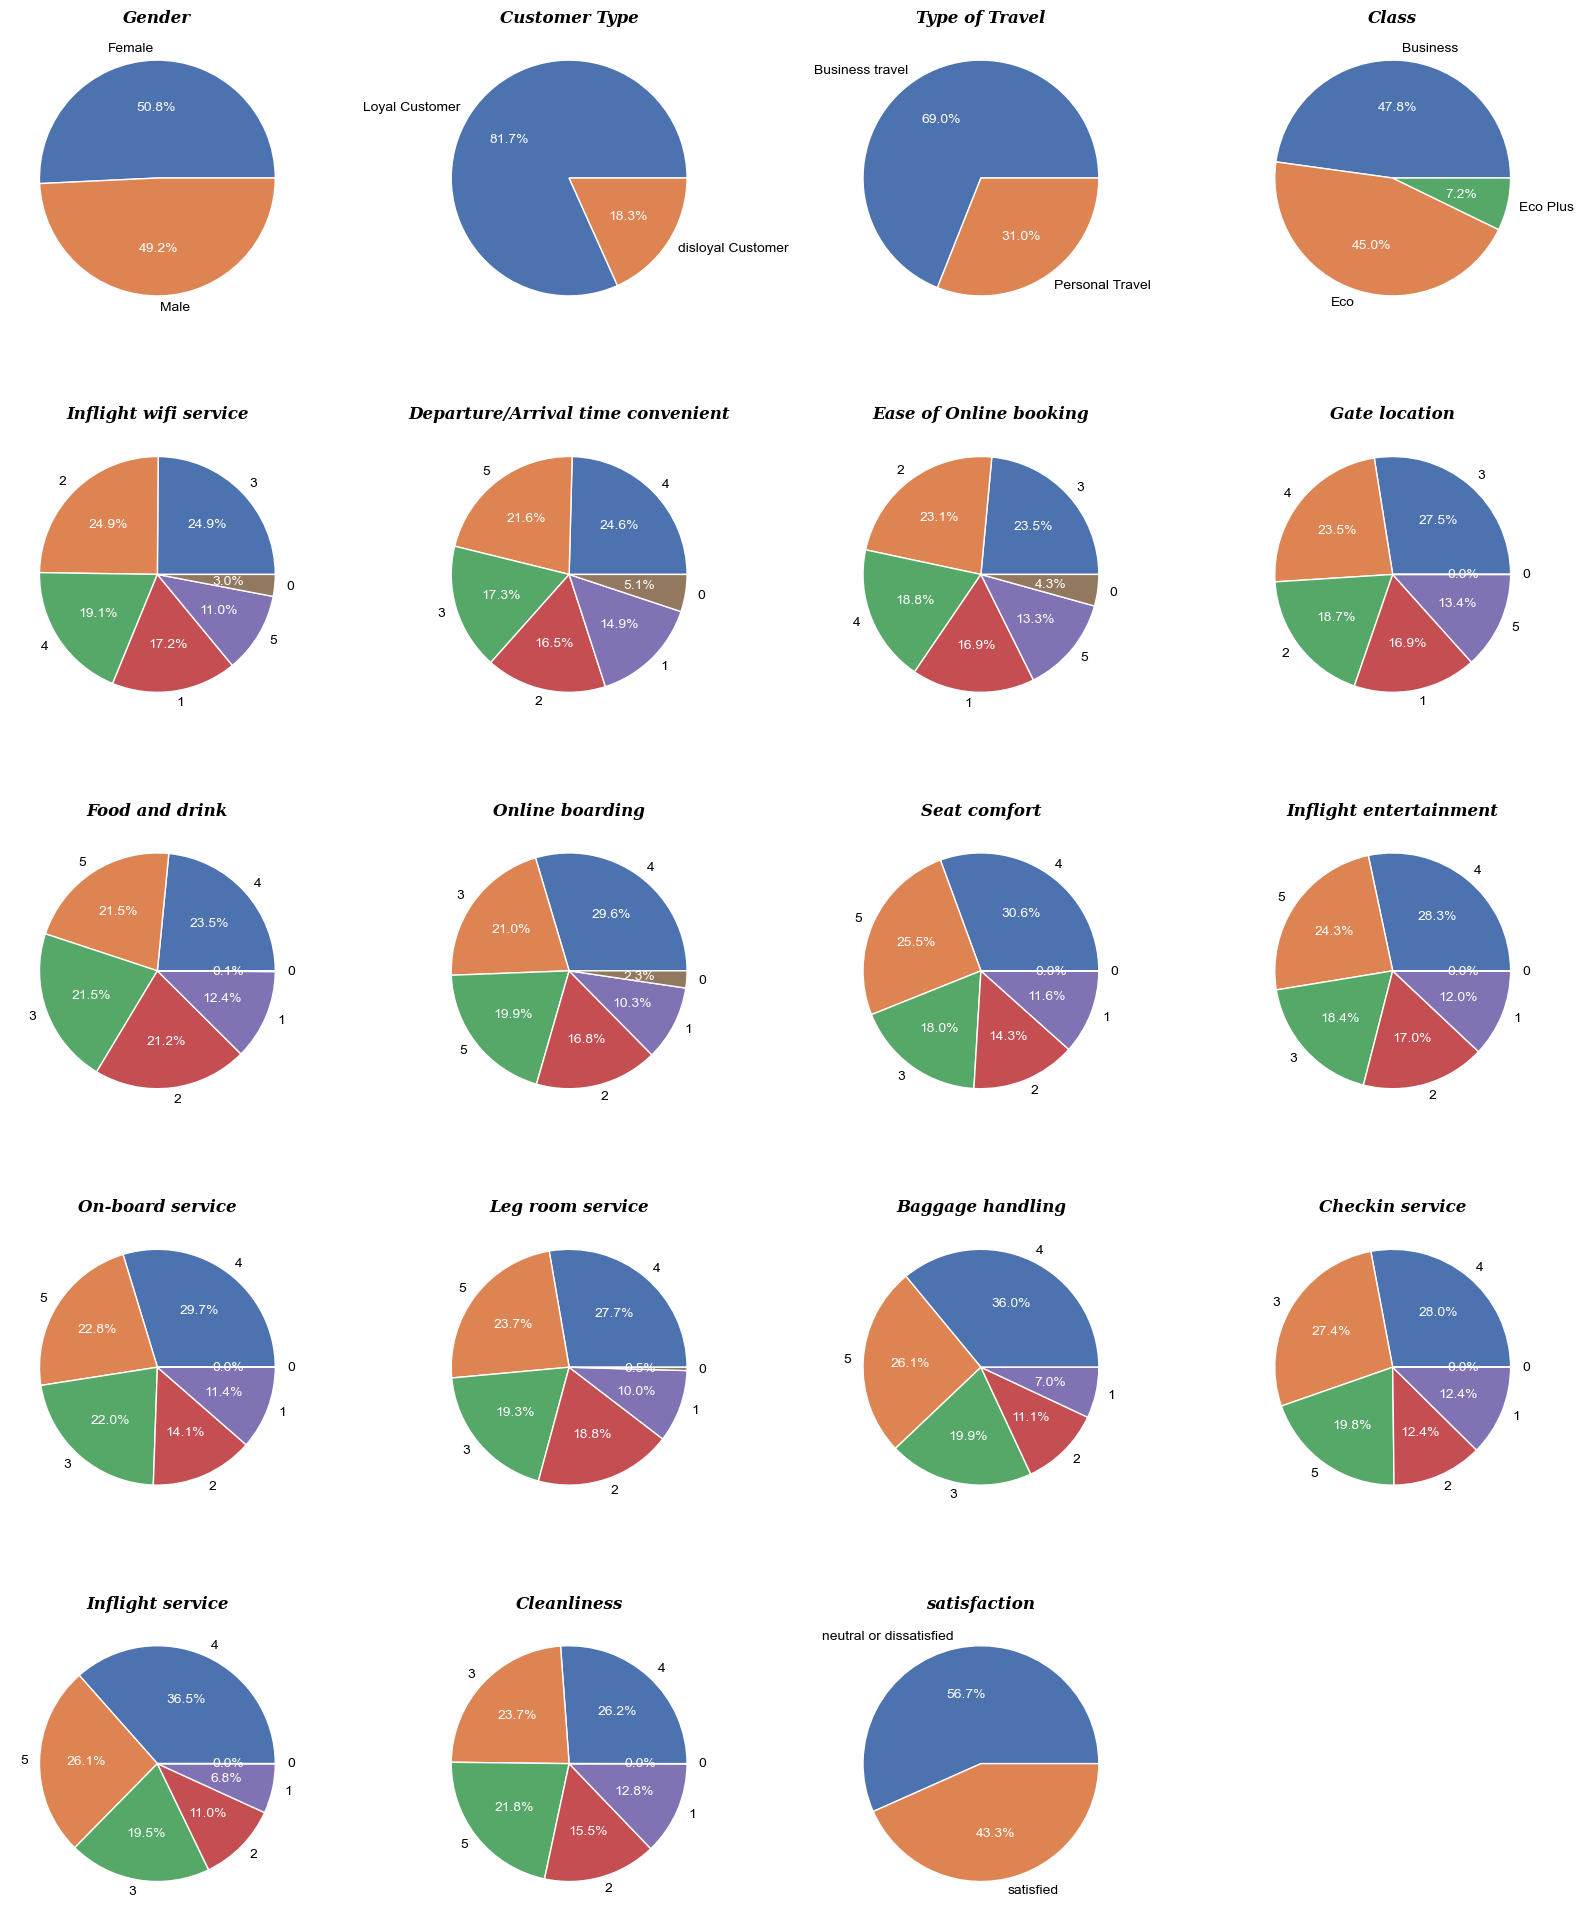

In [19]:
fig, ax = plt.subplots((len(categorical_columns)+1)//4, 4, figsize=(16,20))
ax = ax.flatten()
for i in range(len(categorical_columns)):
    _, _, autotexts = ax[i].pie(df[categorical_columns[i]].value_counts(), 
              labels=df[categorical_columns[i]].value_counts().index,
              textprops={'fontsize': 10, 'color': 'black'}, 
              autopct='%1.1f%%'
              )
    for autotext in autotexts:
        autotext.set_color('white')
    ax[i].set_title(categorical_columns[i], fontsize=12,
                    fontweight='bold', fontstyle='italic',
                    fontfamily='serif', color='black')
for i in range(len(categorical_columns), len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

So now we have a sense of each categorical column in the data.

<br></br>

In [20]:
len(exclude_)

4

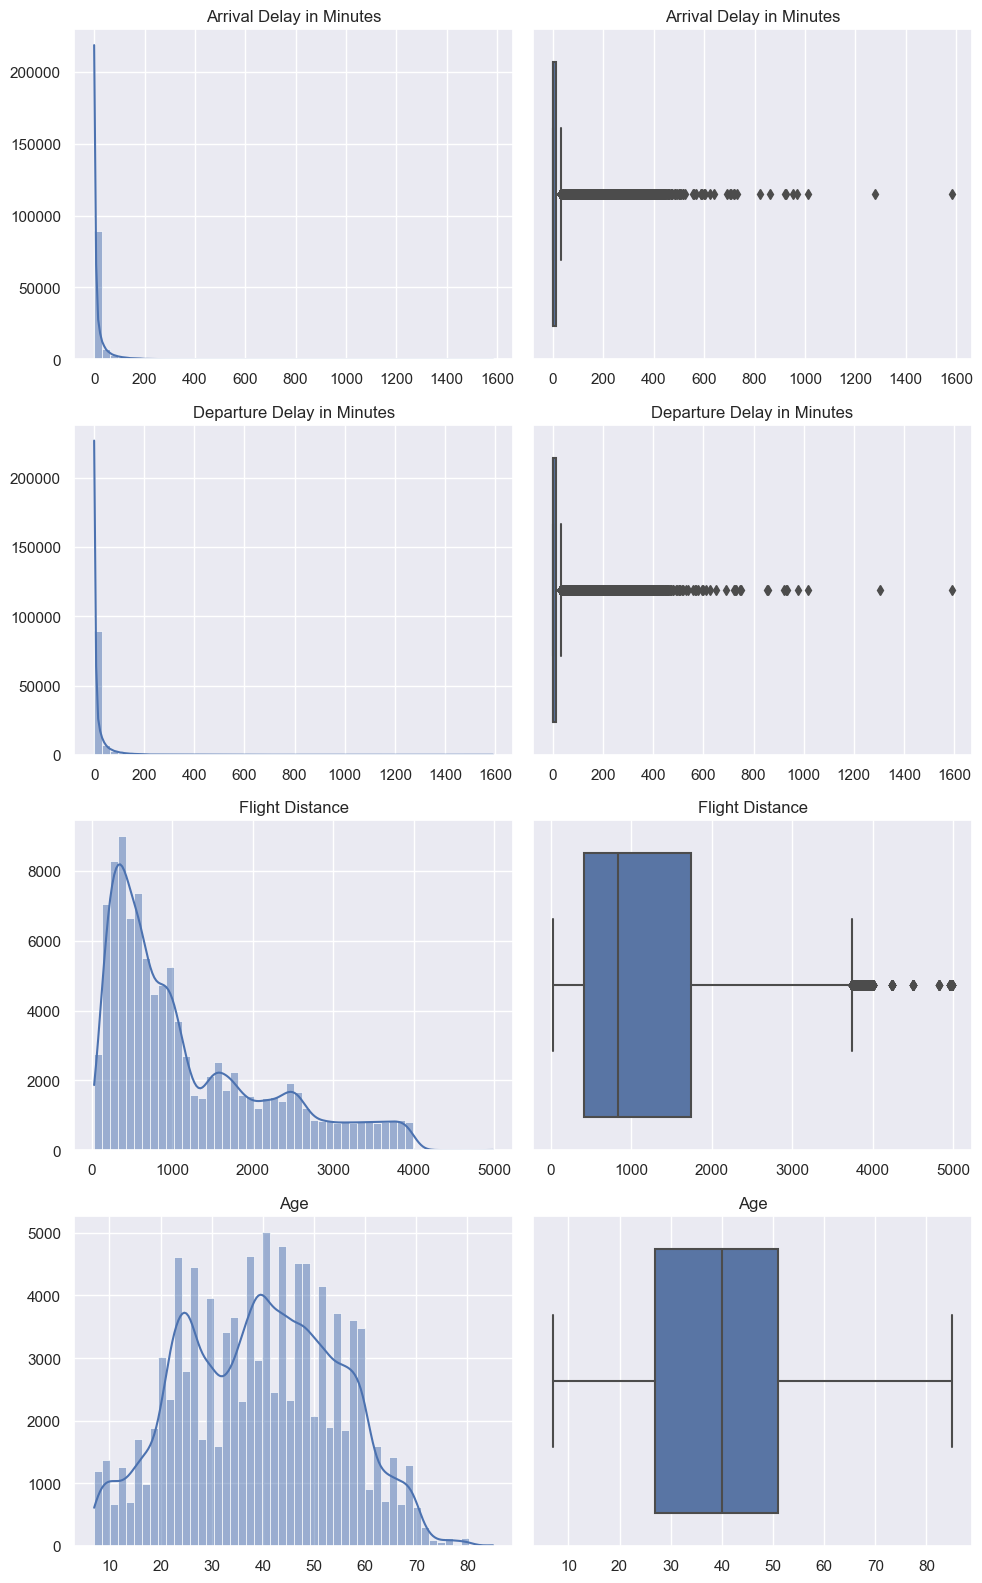

In [21]:
figure, axes = plt.subplots(len(exclude_), 2, figsize=(10,4*len(exclude_)))
axes = axes.flatten()
for i in range(len(exclude_)):
    sns.histplot(df[exclude_[i]], kde=True, ax=axes[i*2], bins=50)
    sns.boxplot(df[exclude_[i]], ax=axes[i*2+1])
    axes[i*2].set_title(exclude_[i])
    axes[i*2+1].set_title(exclude_[i])
    axes[i*2].set_xlabel('')
    axes[i*2+1].set_xlabel('')
    axes[i*2].set_ylabel('')
    axes[i*2+1].set_ylabel('')
plt.tight_layout()
plt.show()

We notice that the 'Arrival Delay in Minutes' and 'Departure Delay in Minutes' columns have a lot of outliers, so we can take np.log1p of these columns to make the distribution more normal.(I tried other logs and this one was the most efficient)

In [22]:
df['Arrival Delay in Minutes'].skew()

6.596636807462695

In [23]:
np.log1p(df['Arrival Delay in Minutes']).skew()

0.8729831492479931

In [24]:
df['Departure Delay in Minutes'].skew()

6.769048944816573

In [25]:
np.log1p(df['Departure Delay in Minutes']).skew()

0.9187639632546695

Much better!

# Bi-variate analysis

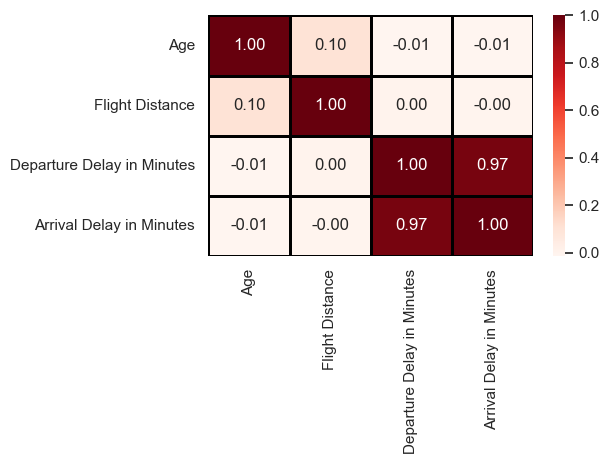

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f', linewidths=1, linecolor='black')
plt.tight_layout()

Ok it seems there are a high correlation between 'Departure Delay in Minutes' and 'Arrival Delay in Minutes', let's discover them more.

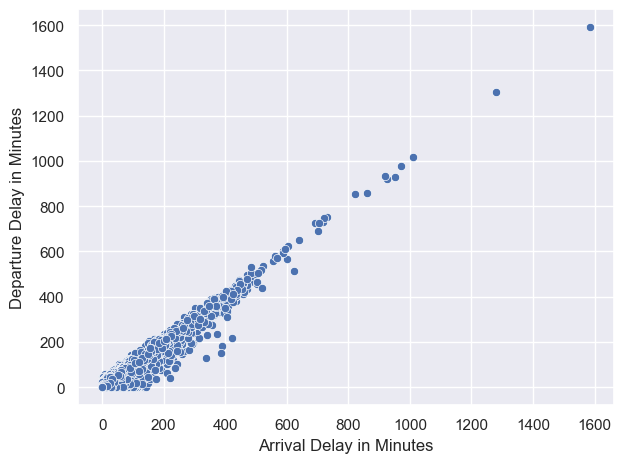

In [27]:
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes')
plt.tight_layout()
plt.show()

Actually it makes sense that every delay in departure is also a delay in arrival.

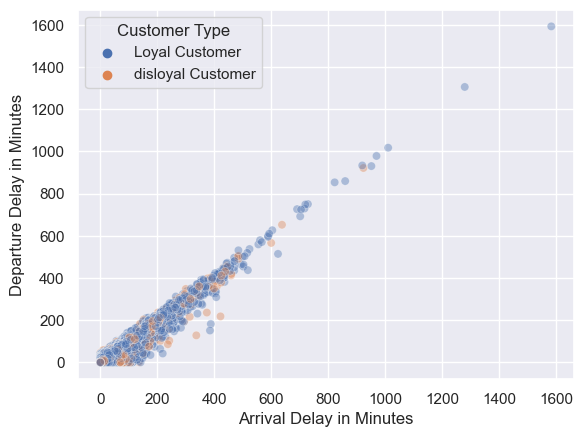

In [28]:
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='Customer Type', alpha=0.4);


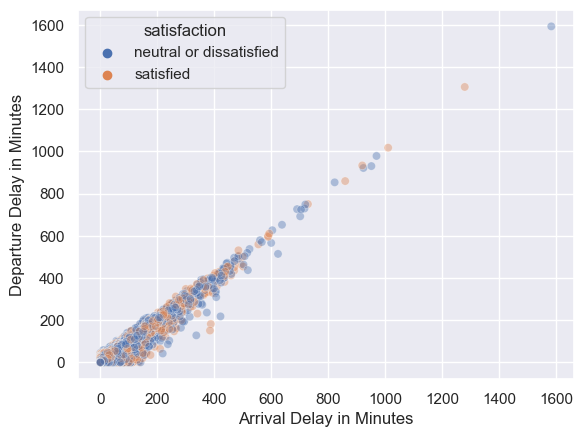

In [29]:
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction', alpha=0.4);


Now we are sure that most of the customers are loyal about the arrival and departure delay times.

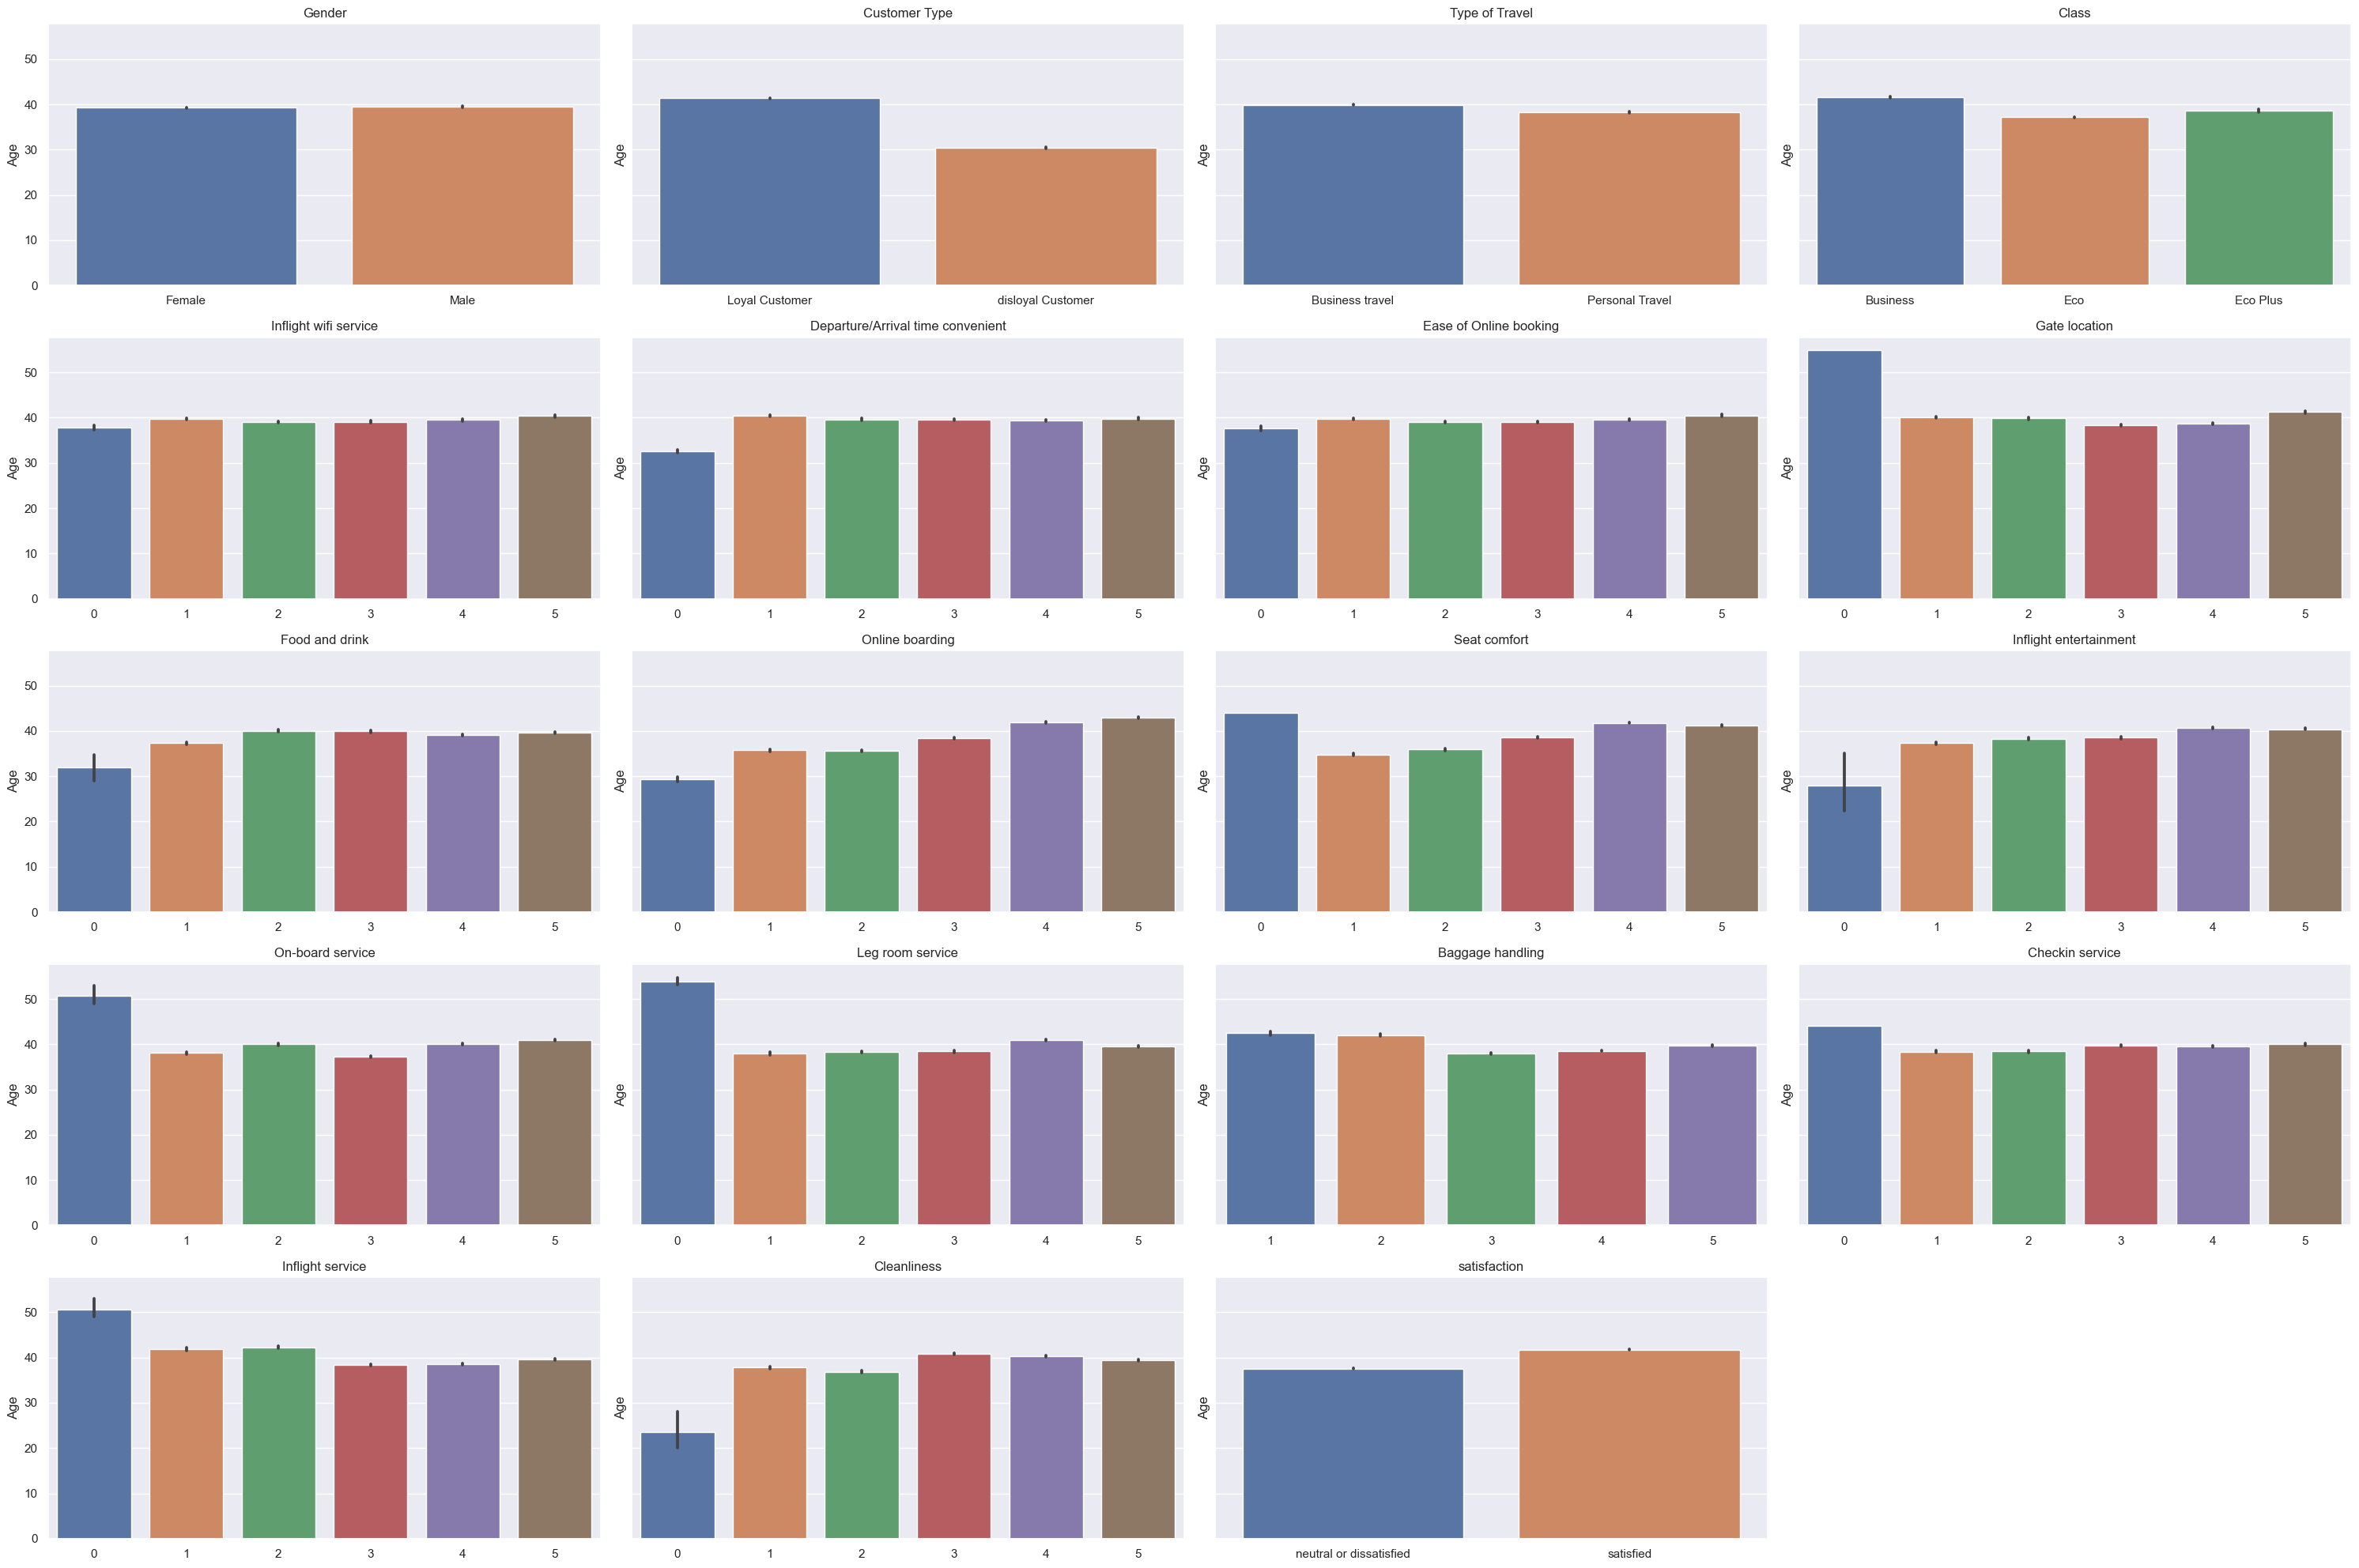

In [30]:
fig, ax = plt.subplots((len(categorical_columns)+1)//4, 4, figsize=(30,20), sharey=True)
ax = ax.flatten()
for i in range(len(categorical_columns)):
    sns.barplot(x=df[categorical_columns[i]], y=df['Age'], ax=ax[i])
    ax[i].set_title(categorical_columns[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Age')
for i in range(len(categorical_columns), len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

We notice that the average age of all categories in the categorical columns is almost equal to 40 years.

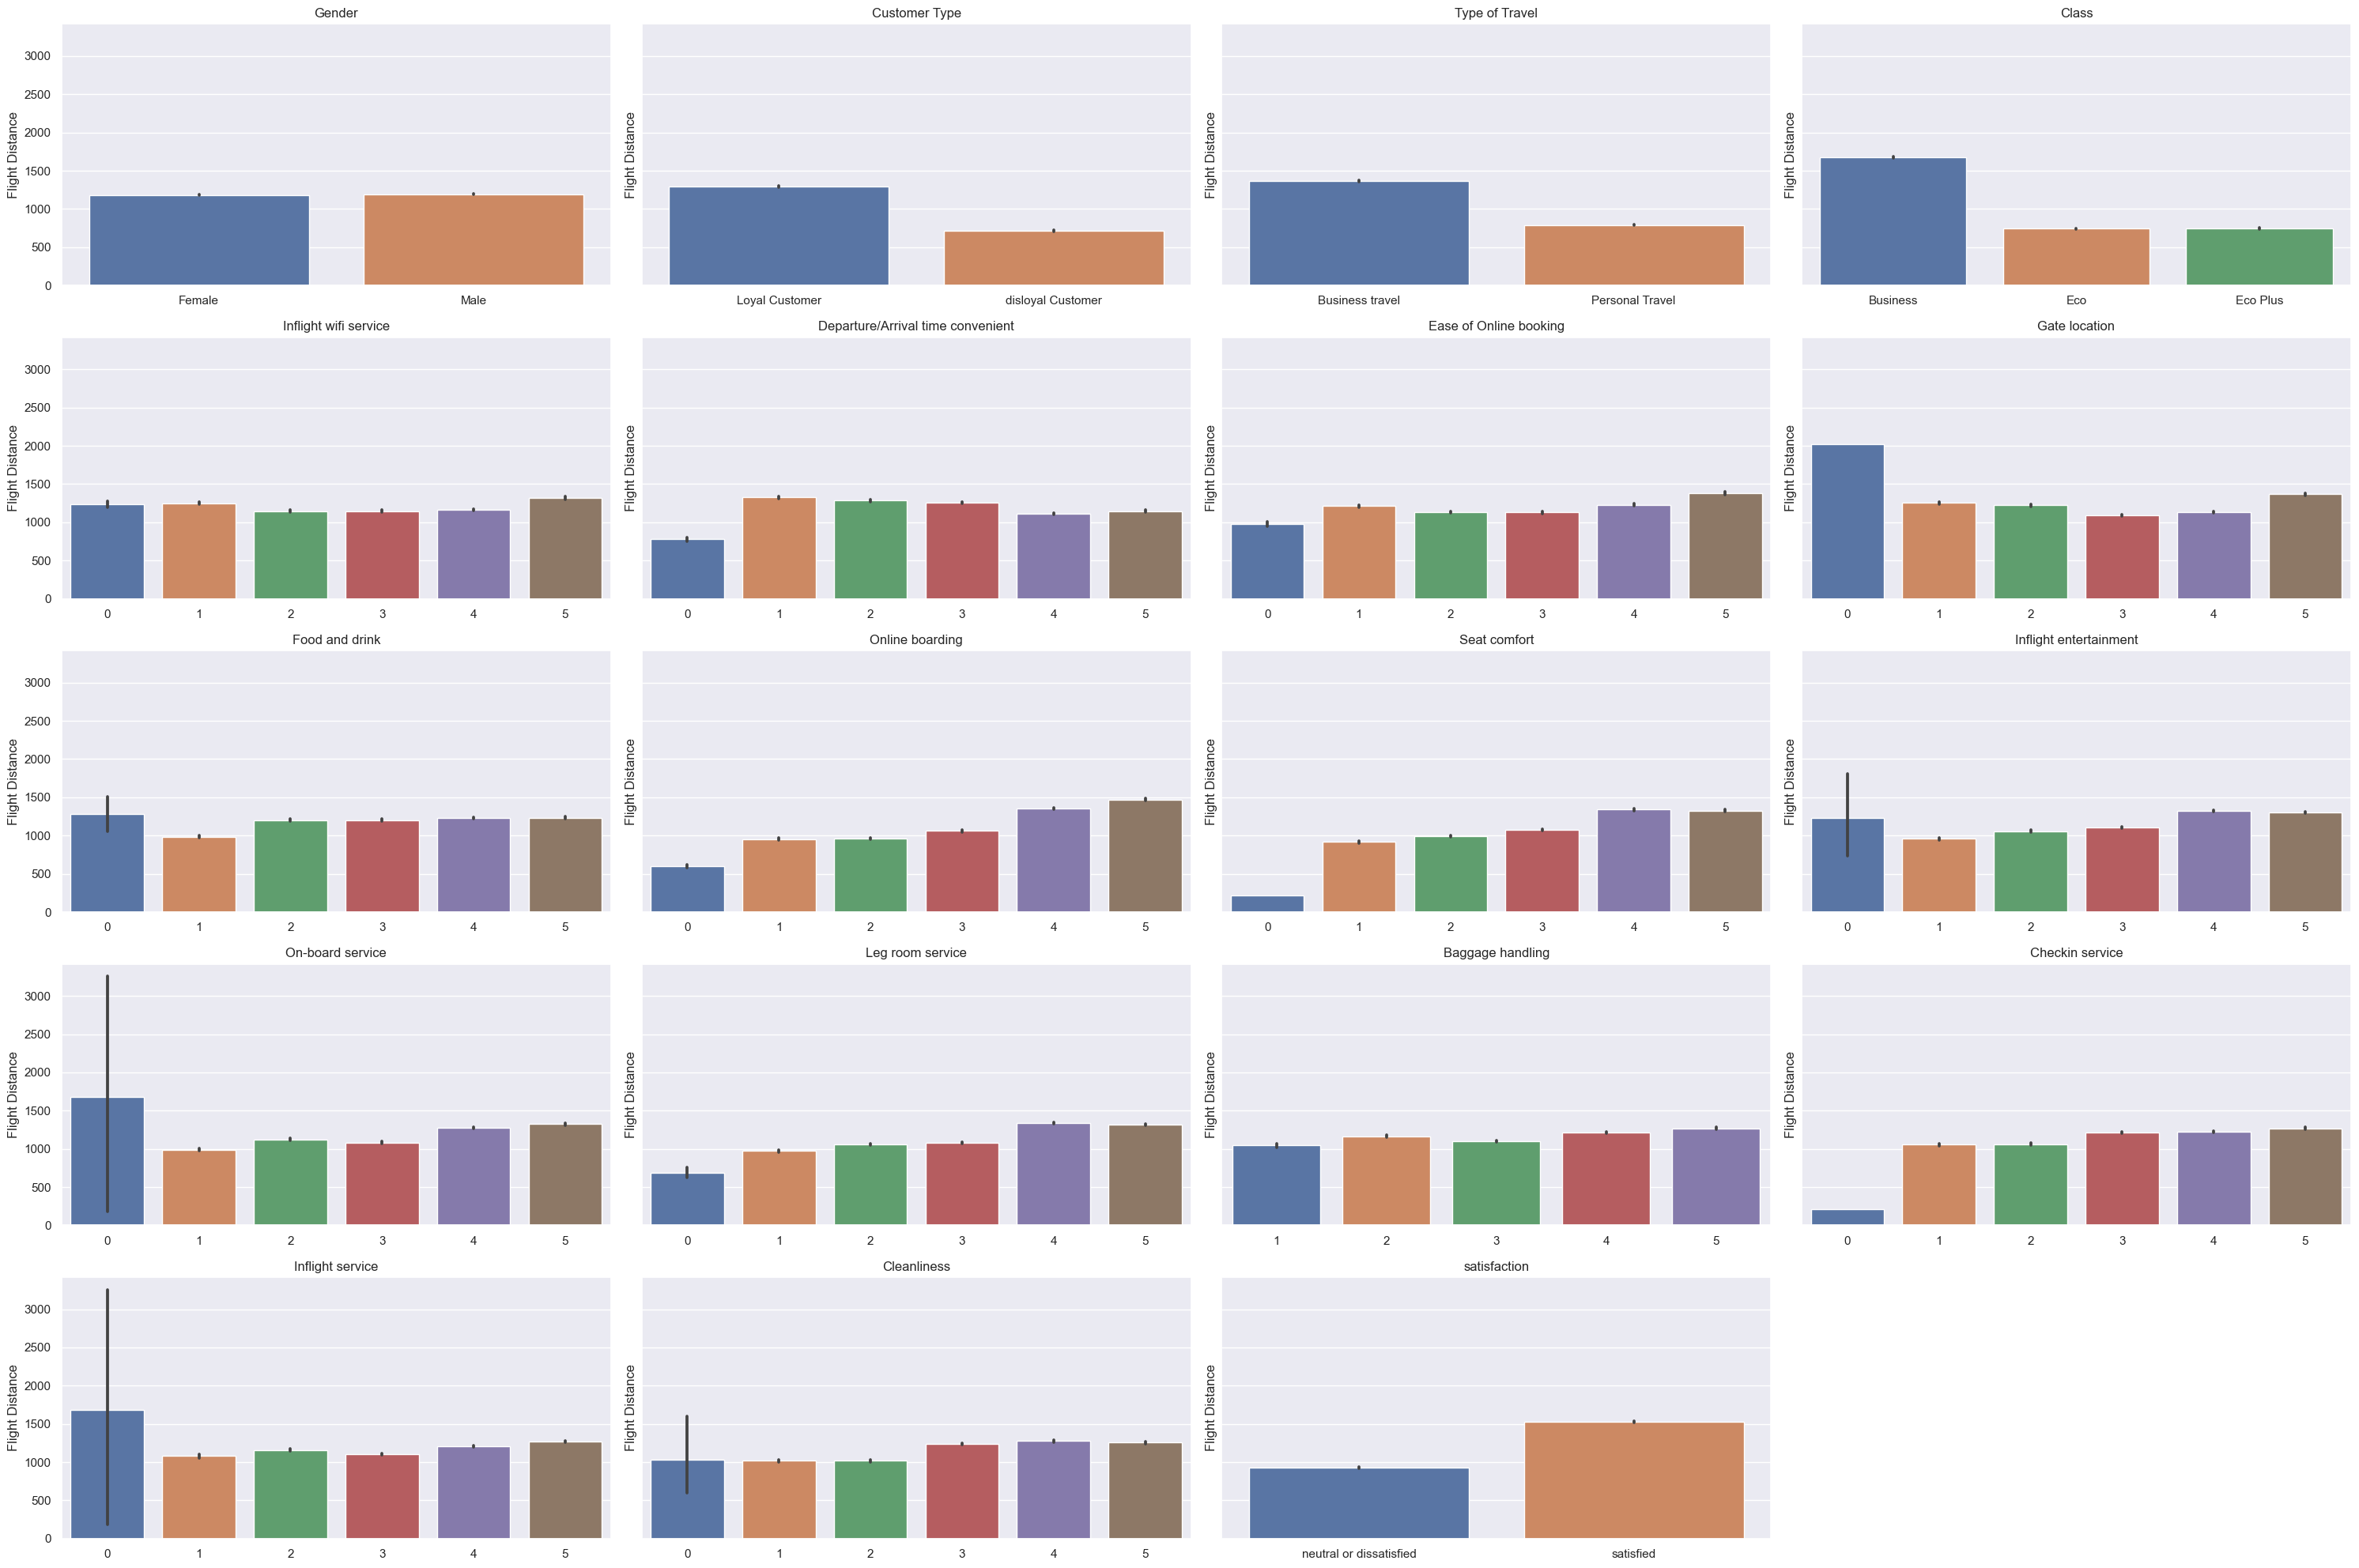

In [31]:
fig, ax = plt.subplots((len(categorical_columns)+1)//4, 4, figsize=(30,20), sharey=True)
ax = ax.flatten()
for i in range(len(categorical_columns)):
    sns.barplot(x=df[categorical_columns[i]], y=df['Flight Distance'], ax=ax[i])
    ax[i].set_title(categorical_columns[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Flight Distance')
for i in range(len(categorical_columns), len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

Also we notice that the average flight distance range from 1000 to 1500 and we have some large distances.

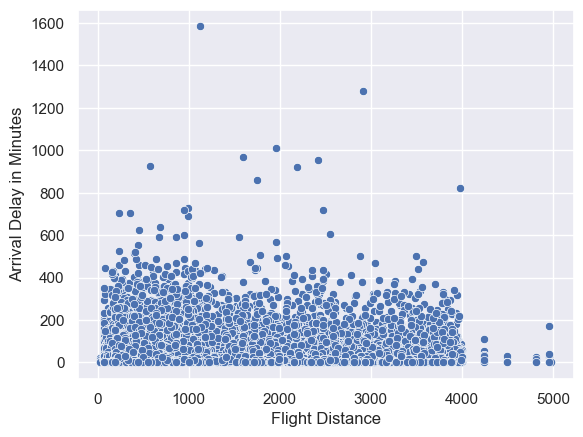

In [32]:
sns.scatterplot(x = df['Flight Distance'], y=df['Arrival Delay in Minutes']);

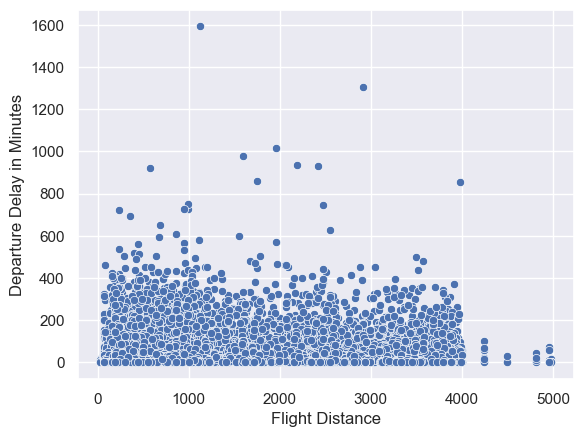

In [33]:
sns.scatterplot(x = df['Flight Distance'], y=df['Departure Delay in Minutes']);

We see no relationship between the flight distance and departure and arrival delay times. 

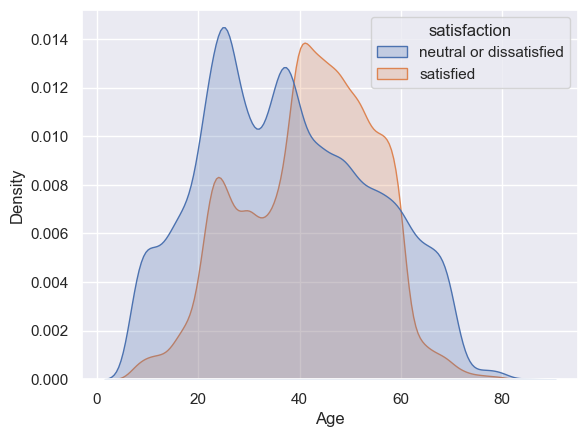

In [34]:
sns.kdeplot(data=df, x='Age', hue='satisfaction', fill=True);

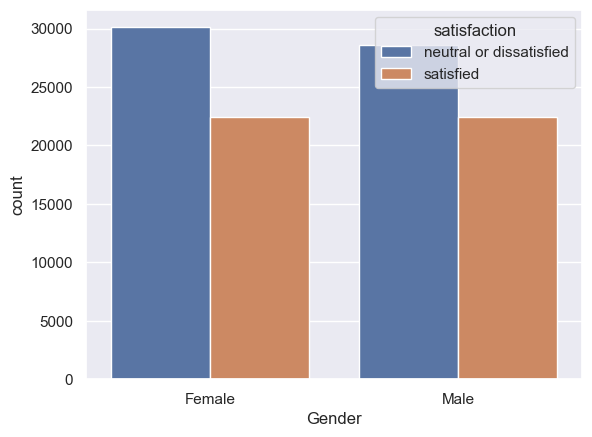

In [35]:
sns.countplot(data=df, x='Gender', hue='satisfaction');

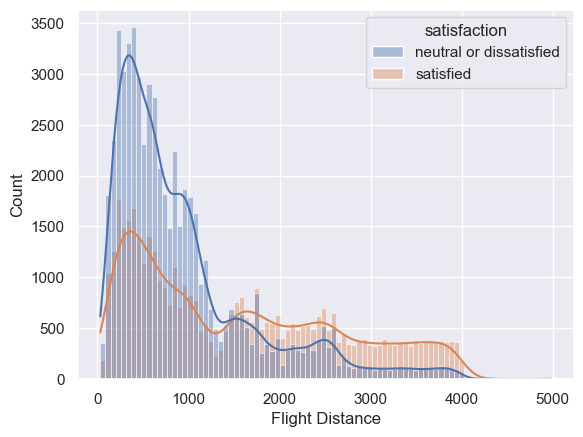

In [36]:
sns.histplot(data=df, x='Flight Distance', kde=True, hue='satisfaction', alpha=0.4);

In [37]:
len(categorical_columns)

19

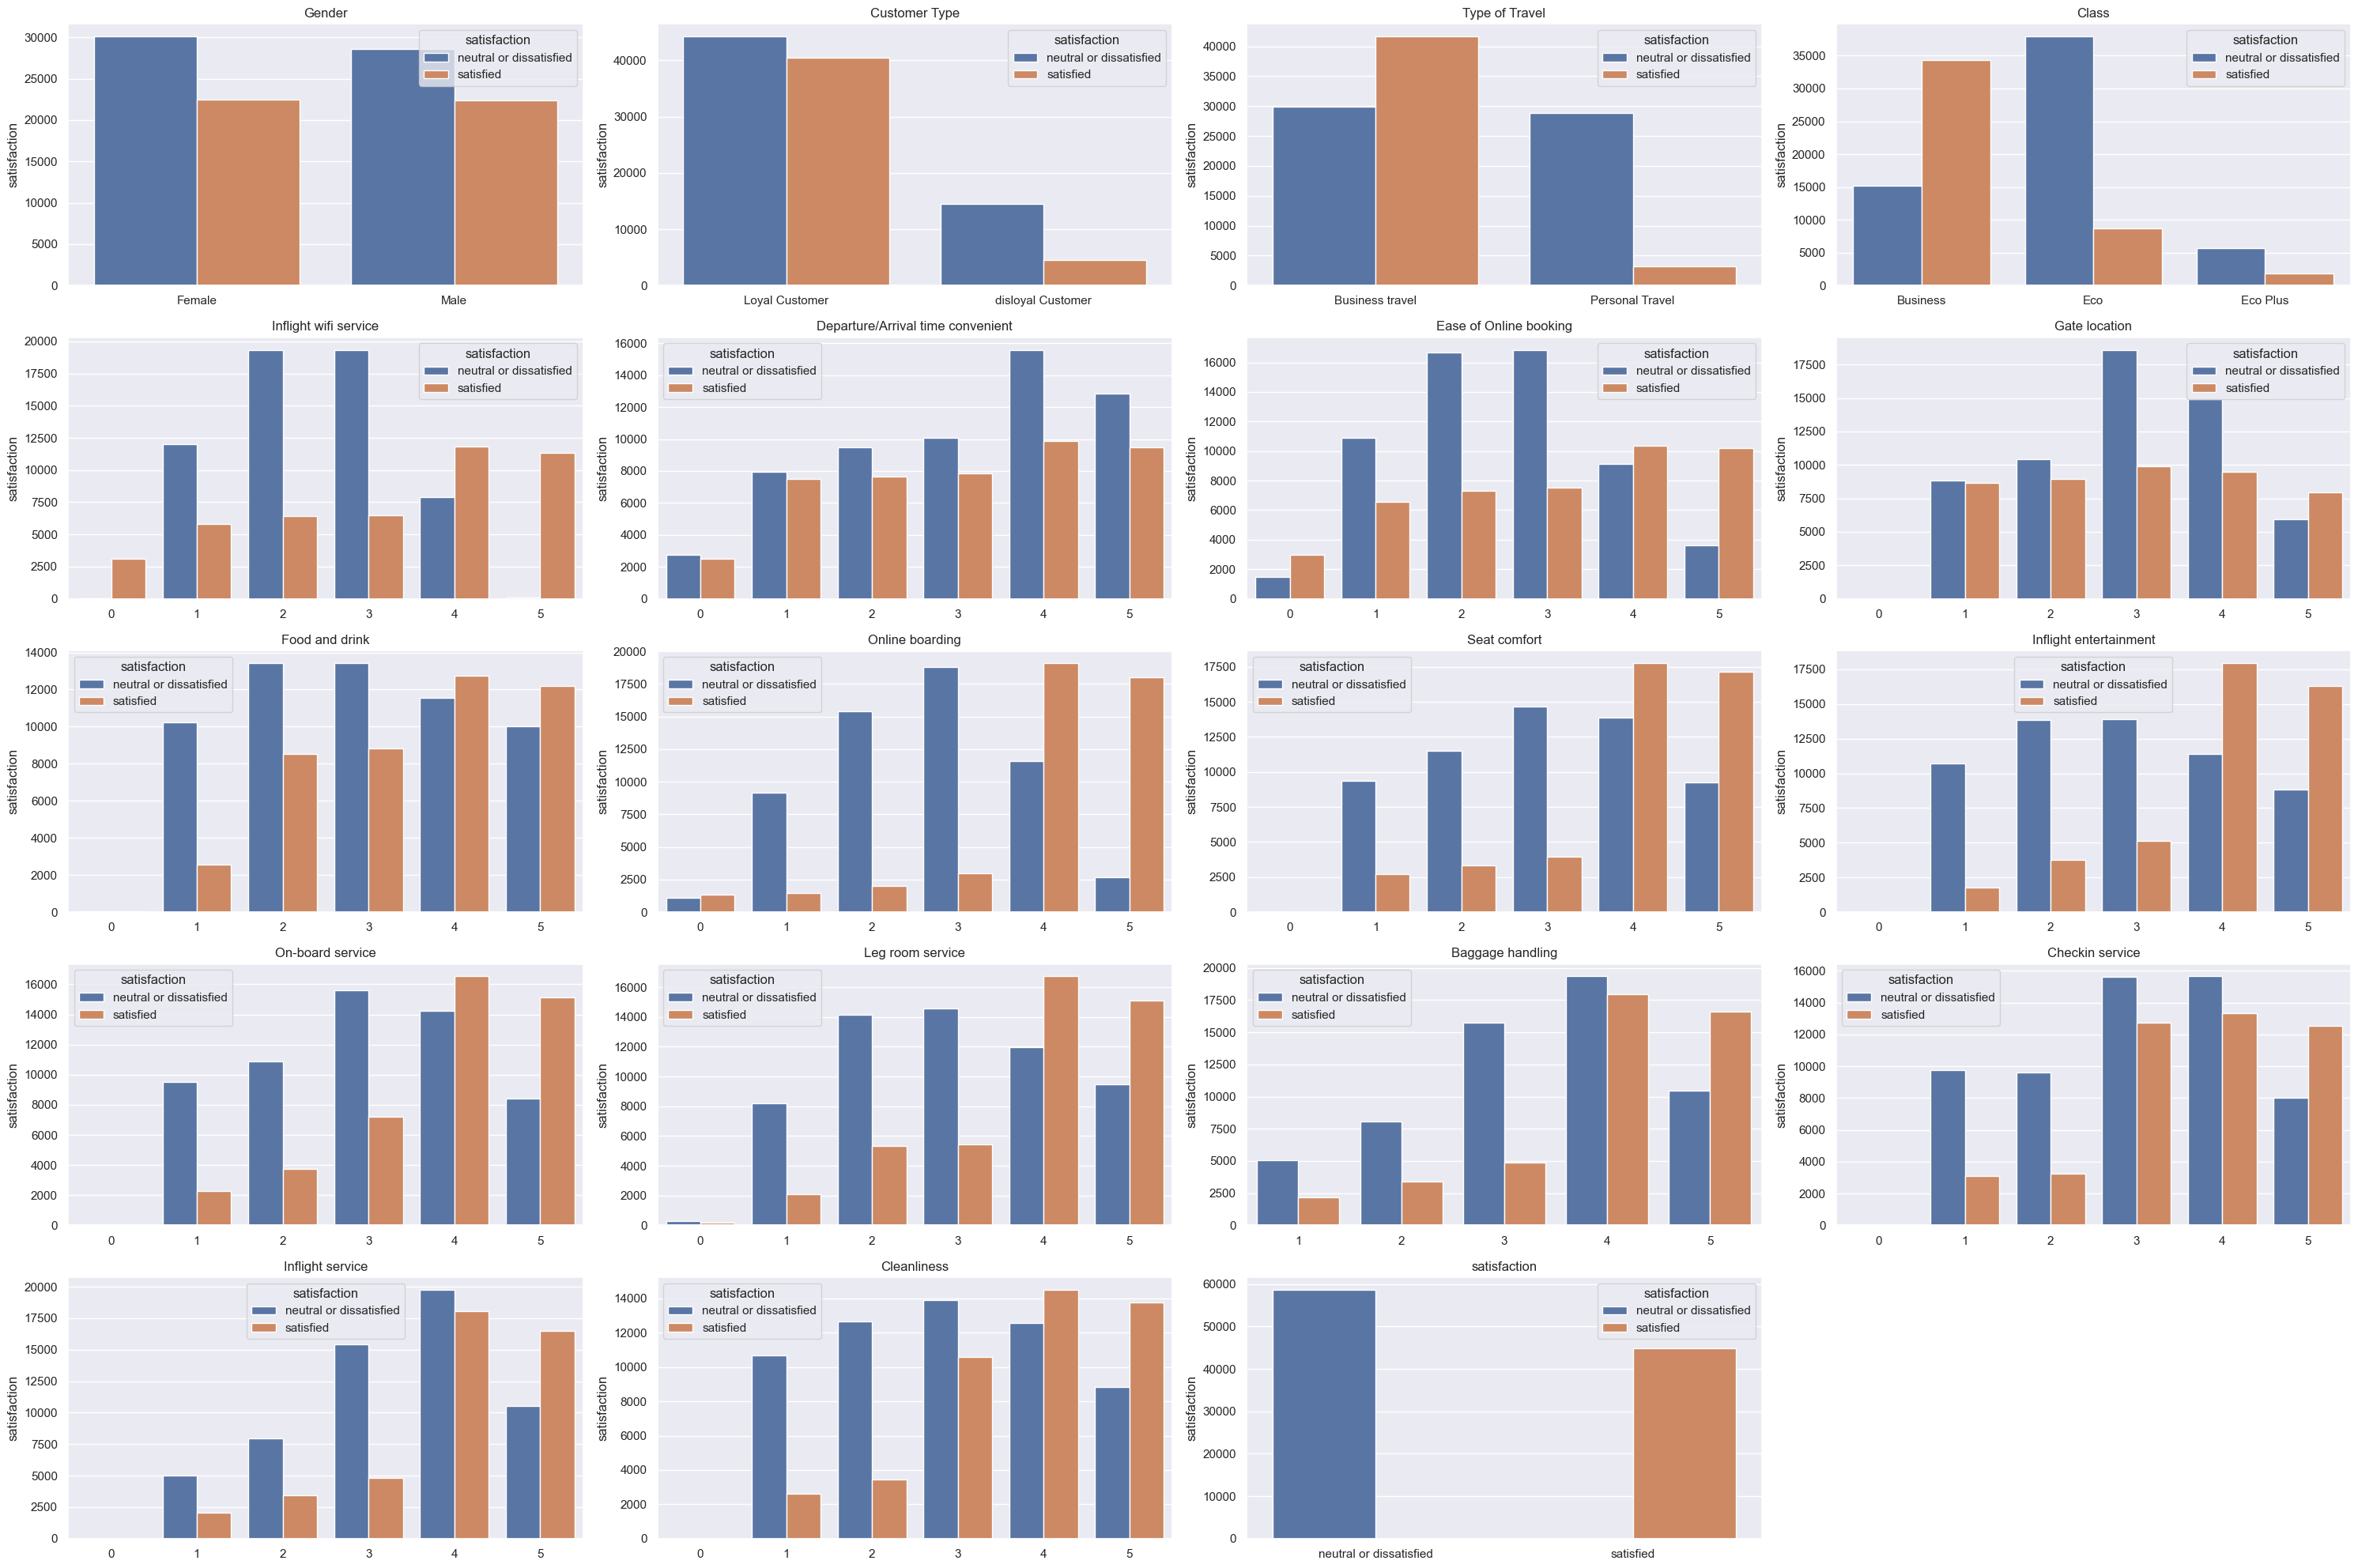

In [38]:
fig, ax = plt.subplots((len(categorical_columns)+2)//4, 4, figsize=(30,20))
ax = ax.flatten()
for i in range(len(categorical_columns)):
    sns.countplot(x=df[categorical_columns[i]], hue=df['satisfaction'], ax=ax[i])
    ax[i].set_title(categorical_columns[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('satisfaction')
for i in range(len(categorical_columns), len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

# Multivariate analysis

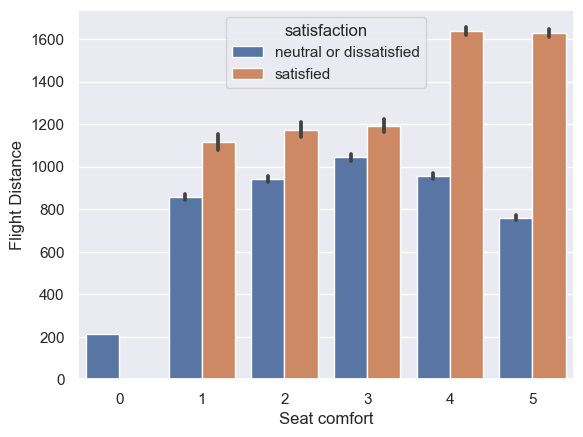

In [39]:
sns.barplot(data=df, x='Seat comfort', y='Flight Distance', hue='satisfaction');

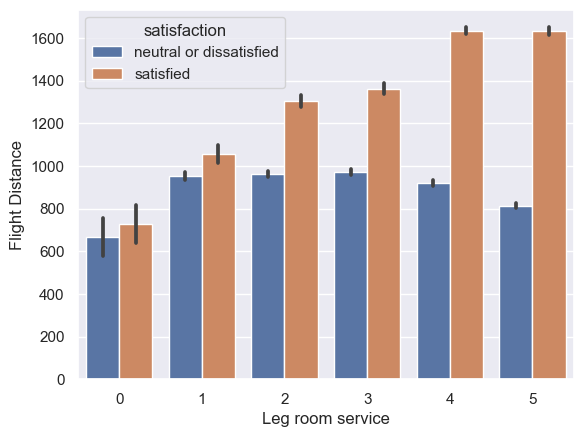

In [40]:
sns.barplot(data=df, x='Leg room service', y='Flight Distance', hue='satisfaction');

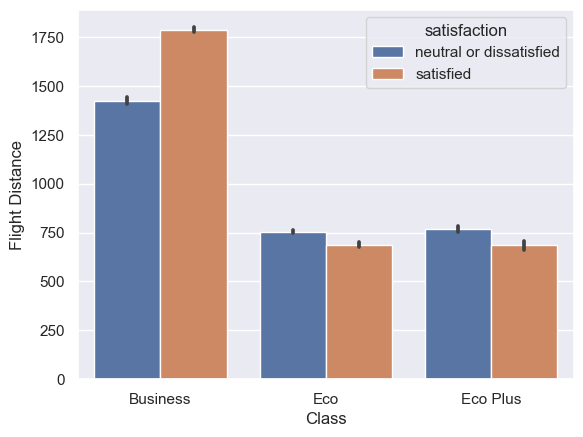

In [41]:
sns.barplot(data=df, x='Class', y='Flight Distance', hue='satisfaction');

I hope you got a good sense of the data and the relationships between the columns.

**If you found it useful, don't forget to upvote, and leave a comment if you have any question or suggestion.**